In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [111]:
df = pd.read_csv('Titanic.csv')

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
df = df.drop(columns=['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Name'], axis=1)

In [114]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [115]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [116]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [117]:
x = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

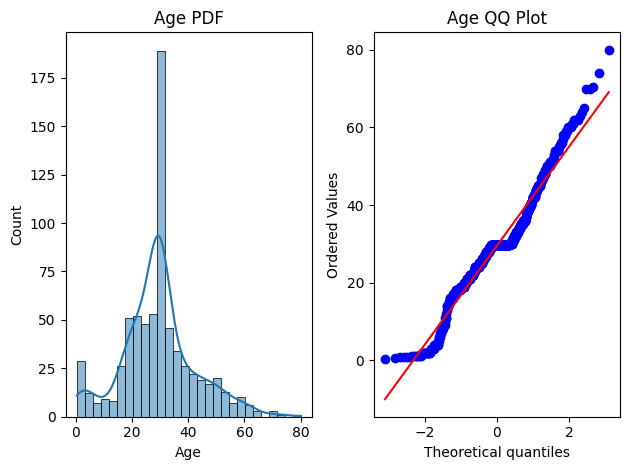

In [119]:
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)  # Use histplot with KDE for better visualization
plt.title('Age PDF')

# QQ plot
plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

# Display both plots
plt.tight_layout()
plt.show()

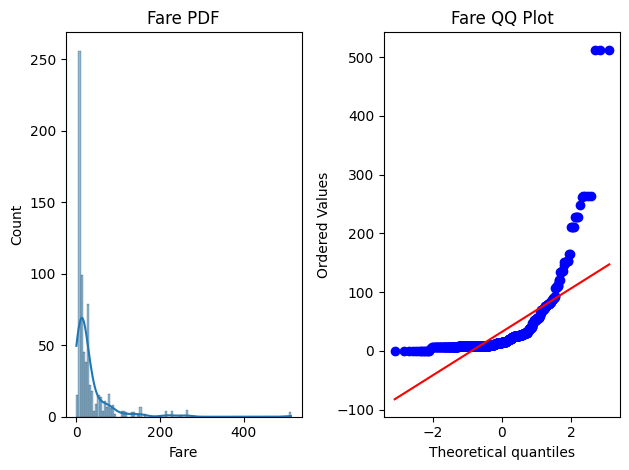

In [120]:
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)  # Use histplot with KDE for better visualization
plt.title('Fare PDF')

# QQ plot
plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

# Display both plots
plt.tight_layout()
plt.show()

In [121]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [122]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.659217877094972


In [123]:
trf = FunctionTransformer(func=np.log1p)

In [124]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [125]:
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.664804469273743


In [126]:
print("Accuracy LR", np.mean(cross_val_score(clf, x_transformed, y, scoring='accuracy', cv=10)))
print("Accuracy LR", np.mean(cross_val_score(clf2, x_transformed, y, scoring='accuracy', cv=10)))

Accuracy LR 0.678027465667915
Accuracy LR 0.6633208489388264


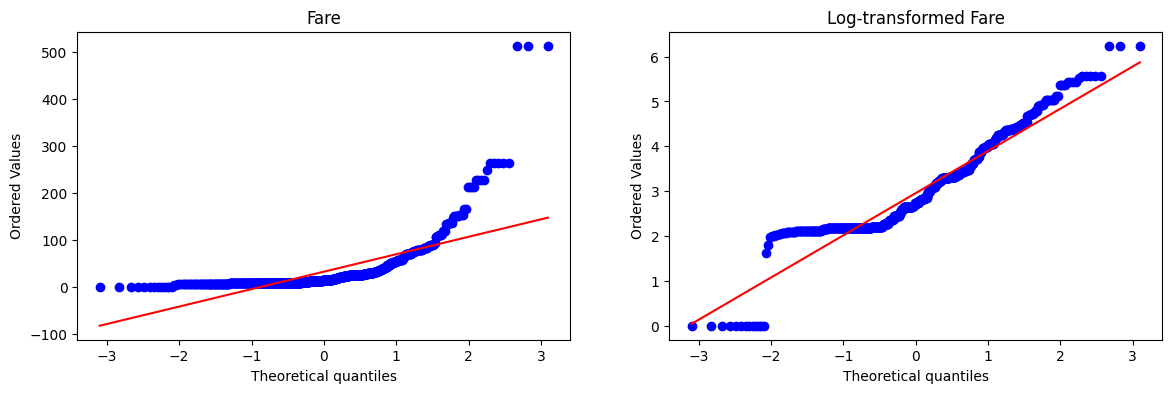

In [127]:
plt.figure(figsize=(14, 4))

# First Q-Q plot for the original 'Fare' variable
plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare')

# Second Q-Q plot for the log-transformed 'Fare' variable
plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Log-transformed Fare')

plt.show()

In [128]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p),['Fare'])], remainder='passthrough')

In [129]:
x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.fit_transform(x_test)

In [130]:
clf.fit(x_train_transformed2, y_train)
clf2.fit(x_train_transformed2, y_train)

y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849
